#CSE422 Lab
## Introduction to Machine Learning: From Theory to Application
---



**Background Information**:
Iris is a family of multiple species of flowering plants. Setosa is one species of flower, Versicolor is another, and virginica is another.

**Problem statement**:
Suppose you are a botany student and while doing botany classes all year round you came to know that some distinguishing features of flower species are **sepal length and width, and petal length and width**. You also came across a set of samples in your class extracted from the Amazon rainforest that have already been classified into their appropriate species by experts.

In your final examination, you are taken to the Amazon rainforest and given the task of predicting the species of a set of new flowers that have not yet been classified.

###The Statistical Learning Framework
----
**1) The learner’s input**: A learner/algorithm has access to the following:

* **Domain set**: An arbitrary set, $X$ where $x_i \in \mathbb{R}^d$  and $d$ is the number of features. This is the set of objects that we
may wish to label. For example, for the iris dataset, the domain set will be the set of all flowers. Usually, these domain points will be represented by a vector of features like a flower's petal width, petal length, and so on. We also refer to domain points as instances/samples and to $X$ as instance/sample space.

* **Label set**: For the iris dataset, the label set is a three-element set: $\{0, 1, 2\}$. Let Y denote our
set of possible labels: \{0, 1, 2\}, where 0 represents the flower type 'setosa', 1 represents the flower type 'versicolor', and 2 represents 'virginica'.

* **Training data**: $S = \{(x_1, y_1), (x_2,y_2) . . . .(x_m, y_m)\}$ is a finite sequence of pairs in $X × Y$: that is, a sequence of labeled domain points. This is the input that the learner has access to. In our case it is the set of flowers for which petal length, petal width, sepal length and sepal width have been measured and their flower type determined by botanists. Such labeled examples are often called training examples. We sometimes also refer to $S$ as a training set.

**2) The learner’s output**: The learner outputs a prediction rule, $h : X → Y$. One can think of the rule as a function. This function is also called a predictor, or a hypothesis. The predictor can be used to predict the label of new domain points.
In our iris dataset, it is a rule that our learner will employ to predict whether future flowers it examines are going to be setosa, virginica or versicolor. Upon receiving a training sequence $S$ a
learning algorithm returns a hypothesis.

**A simple data-generation model** Let us now understand how the training data is generated. First, we assume that the instances (the flowers we encounter) are generated by some probability distribution (in this case, representing the environment). Let $D$ be the probability distribution over $X$. It is important to note that we do not assume that the learner knows anything about this distribution. As to the labels, in the current discussion we assume that there is some “correct” labeling function, $f : X → Y$, and that $y_i = f(x_i)$ for all $i$. The labeling function is unknown to the learner. In fact, this is just what the learner is trying to figure out. In summary, each pair in the training data $S$ is generated by first sampling a point $x_i$ according to $D$ and then labeling it by $f$.

**3) Measures of success**: We define the error of a classifier to be the probability that it does not predict the correct label on a random data point generated by the aforementioned underlying distribution, $D$. That is, the error of $h$ is the probability of drawing a random instance $x$, according to the distribution $D$, such that $h(x)$ does not equal $f(x)$.

We define the error of a prediction rule,  $ h : X → Y $, to be:
$$L_{D,f} (h) = P_{x∼D} [ h(x)  \neq  f(x) ] $$ That is, the error of such $h$ is the probability of randomly choosing an
example $x$ for which $h(x) \neq f(x)$. The subscript $(D, f)$ indicates that the error is measured with respect to the probability distribution $D$ and the
correct labeling function $f$. $L_{(D,f)}(h)$ has several synonymous names such as the generalization error, the risk, the true error of $h$, or the loss of the learner.

**Note on the information available to the learner**: The learner is
blind to the underlying distribution $D$ over the Amazon rainforest and to the labeling function $f$. In our iris example, we have just arrived in the Amazon rainforest and we have no clue as to how the flowers are distributed and how to predict the species they fall under. The only way the learner can interact with the environment is through observing the training set(which was seen in the student's classroom).

This form of learning is called Supervised Learning since the learner is provided with labels ($y_i$, where $i = 0,1,2,...,m$) while training.



**Reference**: Shalev-Shwartz, S., & Ben-David, S. (2017). Understanding Machine learning: from theory to algorithms. Cambridge: Cambridge University Press.

## A First Application: Classifying Iris Species

#### Meet the Data

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [ ]:
print(type(iris_dataset))

<class 'sklearn.utils._bunch.Bunch'>


In [ ]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Knowing Your Task and Knowing Your Data

In [ ]:
#print(iris_dataset['DESCR'])

In [ ]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [ ]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [ ]:
print("First five rows of data:\n", iris_dataset['data'][:10])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [ ]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [ ]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


We can see that there are 3 classes of target labels. i.e. the flowers have been categorized into 3 classes.

In [ ]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Traditional Programming vs Machine Learning
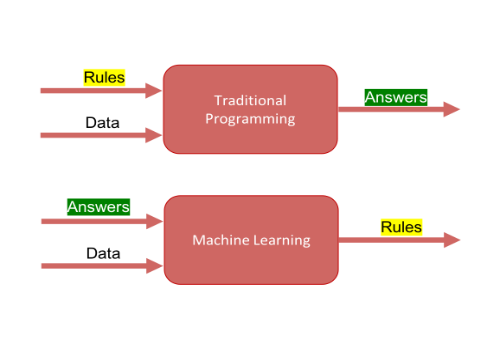

**Scenario:** You are given the CGPA of students as input, and you have to label a student to be in probation student or not based on the CPGA. If CGPA is lower than 1.5, then he/she is a probation student. If not, he/she is not a probation student


**Traditional Programming:** The input is the CGPA of the student which is the data, the rule is the boundary of the condition for the probation. If CGPA is lower than 1.5, then he/she is a probation student. If not, he/she is not a probation student. Now, lets say the input is 1.4 then the answer is probation student.


**Machine Learning:** Now the along with the data (CGPA), the answer is given. The machine learning model now find the connection between CGPA and answer (probation student or not) to generate the rule or boundary. The better fitted / trained the model is, more accurate the boundary.




# Machine Learning Pipeline



1.   **Data Collection:** Gathering raw data from various sources such as databases, APIs, or sensors.
2.   **Data Preprocessing:** Cleaning, transforming, and preparing data for modeling. This involves handling missing values, feature extraction, encoding categorical variables, normalization , etc.
3. **Feature Engineering:** Creating new features or selecting the most relevant features to improve model performance.
4. **Data Splitting:** Splitting the dataset into train and test set. Additionally a validation / dev can be created to perform model tuning.
5. **Model Training:** Selecting a machine learning algorithm and training it on the processed train set.
6. **Model Prediction:** Using the trained model on a test set to make prediction.
7. **Model Evaluation:** Assessing the trained model using metrics like accuracy, precision, recall, or F1-score on validation data.
8. **Model Tuning:** Optimizing hyperparameters and repeating from step 5 to improve model performance.




## What is Scikit learn?

**Scikit-learn** (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support k-nearest neighbours, support vector machines, random forests, gradient boosting and so on, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. It also has other modules with helpful functions used in machine learning projects such as `train_test_split`.

                                                                --from Wikipedia


We have already first 3 steps of the Machine Learning pipeline. The preprocessing steps are discussed later on in the colab file.  
Now lets see a brief overview of the rest of the Machine Learning Pipeline.

### Step 4: Data Splitting

* Why do we train_test_split?
* Stratified v.s. Random Split

In [ ]:
from sklearn.model_selection import train_test_split
#random data splitting
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size = 0.25, random_state=0)

In [ ]:
#Stratified data splitting
#y = pd.DataFrame(iris_dataset['target'])
#X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size = 0.25, random_state=0, stratify = y)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)




> Visualizing your data to gain more insight.



From the below scatter matrix, we can see that one of the class is linearly separable from the other 2, but the other 2 are not linearly separable from each other. So it's better if we use a non-linear model like KNN.

It is important to understand how your data is distributed and use a suitable algorithm accordingly.

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

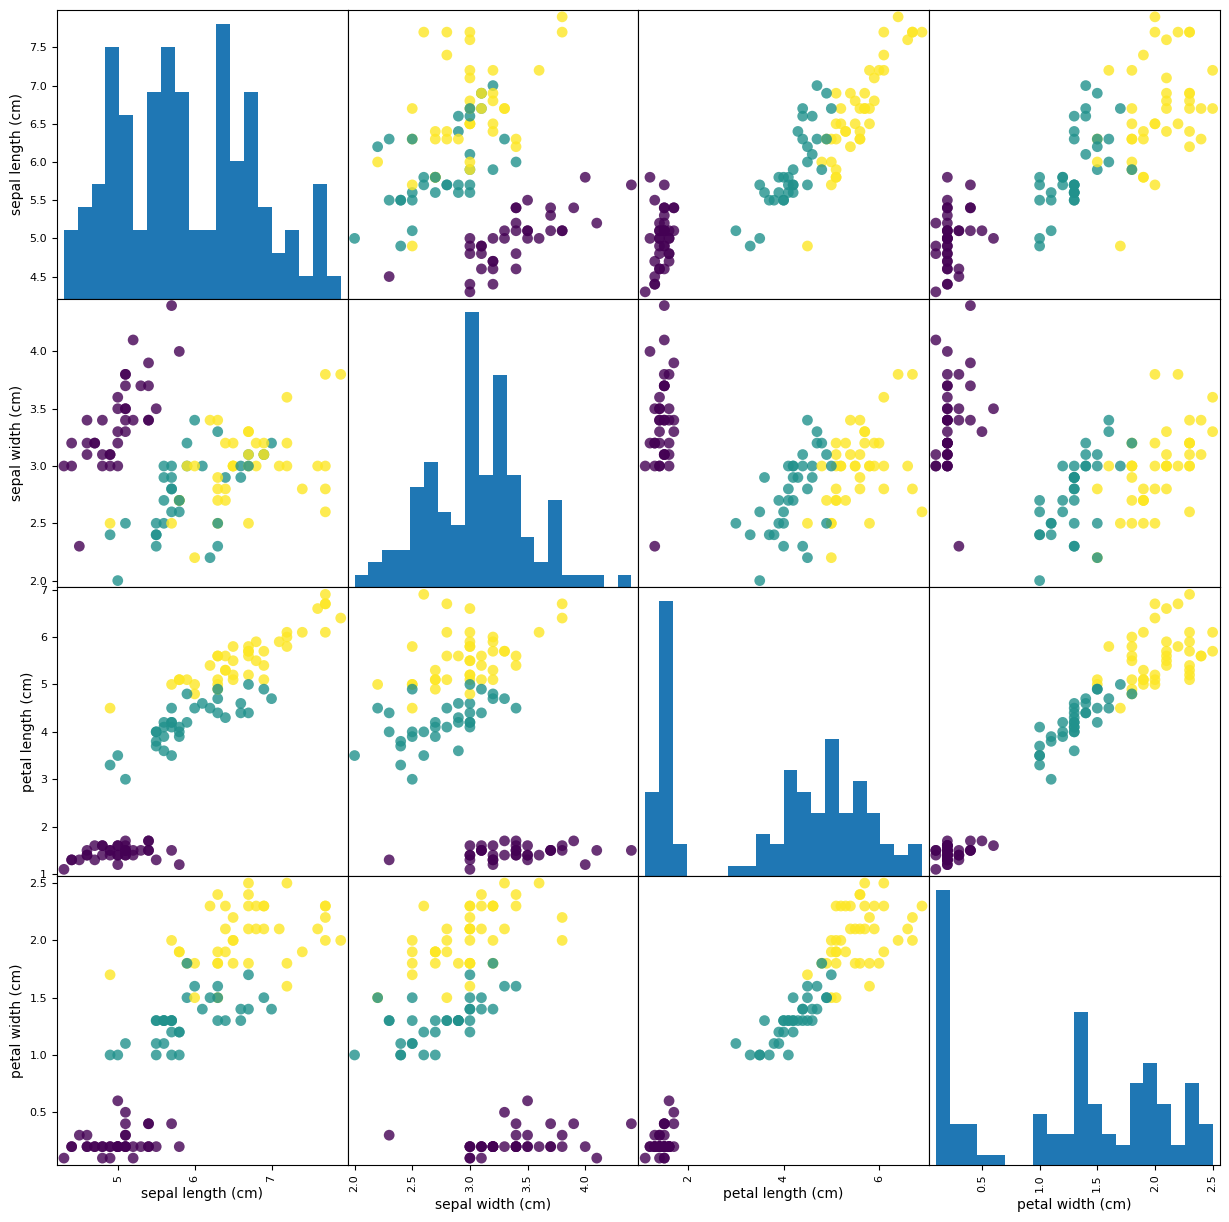

In [ ]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)

* Now, we will check if there are somewhat equal number of samples for each class. Otherwise, if there is a big shortage of samples of one class, my model might not learn to identify that specific class.

* 0 - iris-setosa, 1 - iris-versicolor, 2 - iris-virginica

Text(0, 0.5, 'no of flowers')

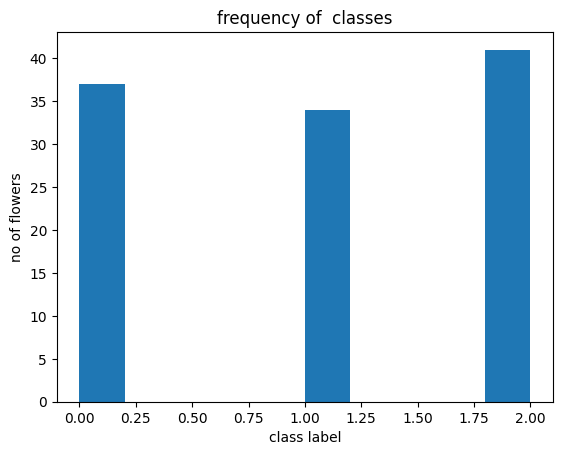

In [ ]:
fig,ax = plt.subplots()
ax.hist(y_train)
ax.set_title('frequency of  classes')
ax.set_xlabel('class label')
ax.set_ylabel('no of flowers')

### Step 5: Model Training
For this step, we need to choose a machine learning model. Since we are working with a classification dataset (target label are 0 , 1 and 2), we must choose a classifier
* KNN is a non-linear classifier; exactly what we need!

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)  #Training the model to find connection between X and y

KNeighborsClassifier(n_neighbors=3)

### Step 6: Model Prediction

In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [ ]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])  #this is the prediction for one test input

Prediction: [0]
Predicted target name: ['setosa']


In [ ]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)   #this is the prediction for entire test set

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


### Step 7: Model Evaluation



> Manual Calculation



In [ ]:
count = 0
for i in range( len(y_test) ):
    if y_pred[i] != y_test[i]:
        count = count + 1
error = count/len(y_pred)
print( "Error = %f " % (error*100) + '%' )
accuracy = (1-error)
print( "Accuracy = %f " % (accuracy*100) + '%' )

Error = 2.631579 %
Accuracy = 97.368421 %




> Some easier ways to calculate accuracy.



In [ ]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using sklearn: {:.2f}".format(accuracy))


Accuracy using sklearn: 0.97


The `knn.score()` function takes in X_test, calls the `predict` function and then calls the `accuracy_score` function.

Basically, carries the two steps of: 1) calculating prediction and 2) evaluation the model, with one function call.

In [ ]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


### Outlook of the entir process

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


### Summary

1) Split your data set into train and test sets.

2) Create the model object.

3) Train(using `.fit(X_train, y_train)`) your ML model on training set.

4) Calculate the predictions (using `.predict(X_test)`) of data in the test set.

5) Evaluate the predictions by calculating the accuracy on the test set.


.

.

**Reference**:
Müller Andreas Christian, and Sarah Guido. Introduction to Machine Learning with Python a Guide for Data Scientists. OReilly, 2018.



---





# Pre-processing

*   First we need to read in the dataset.
*   Get to know your dataset using data vizualisation and other techniques

After that preprocess the dataset using the following techniques:
1. Handling Null Values - By removing or by imputing
2. Feature Engineering
3. Feature Selection
4. Removing Outliers
5. Feature Scaling or Standardization

The dataset is now processed, hence we can now move on to train-test splitting.



In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np

### 1. Handling Null Values

In [ ]:
volunteer = pd.read_csv('https://raw.githubusercontent.com/labib15/Machine-Learning-Datasets/main/volunteer_opportunities.csv')
#csv read directly from github loaded onto volunteer dataframe. It can be read from google drive or locally as well

volunteer.head(3)

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,4996,37004,50,0,Volunteers Needed For Rise Up & Stay Put! Home...,737,Building on successful events last summer and ...,NaN,NaN,NaN,...,July 30 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5008,37036,2,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,Strengthening Communities,...,February 01 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5016,37143,20,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,Strengthening Communities,...,January 29 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
volunteer.shape

(665, 35)

In [ ]:
volunteer.isnull().sum() #counting the number of null values in the dataframe

,0
opportunity_id,0
content_id,0
vol_requests,0
event_time,0
title,0
hits,0
summary,0
is_priority,603
category_id,48
category_desc,48


**Option 01: Removing the column**

This process is usefull when a column has mostly null value and it is an irrelevant column.

In [ ]:
volunteer = volunteer.drop(['Census Tract'], axis = 1) #3 columns dropped

volunteer.shape

(665, 31)

**Option 02: Dropping rows with null values**

This process is usefull only when there are only a few rows with null values

In [ ]:
# Check how many values are missing in the category_desc column
print("Number of rows with null values in category_desc column: ", volunteer['category_desc'].isnull().sum())

# Subset the volunteer dataset
volunteer_subset = volunteer[volunteer['category_desc'].notnull()]

# Print out the shape of the subset
print("Shape after removing null values: ", volunteer_subset.shape)

Number of rows with null values in category_desc column:  48
Shape after removing null values:  (617, 31)


In [ ]:
print("Shape of dataframe before dropping:", volunteer.shape)
volunteer = volunteer.dropna(axis = 0, subset = ['category_desc'])
print("Shape after dropping:", volunteer.shape)

Shape of dataframe before dropping: (665, 31)
Shape after dropping: (617, 31)


**Option 03: Imputing values**

This process is useful when we have a useful column with few null values

In [ ]:
sales = pd.read_csv('https://raw.githubusercontent.com/labib15/Machine-Learning-Datasets/refs/heads/main/sales.csv', index_col = ['month'])
sales

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,NaN,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55





> Method 1 : Putting a fixed value in NaN





In [ ]:
sales.fillna(50)  #fill the Null Values (NaN) with a fixed value of 50

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,50.0,72
Apr,77,87.0,20
May,132,50.0,52
Jun,205,60.0,55


In [ ]:
sales = pd.read_csv('https://raw.githubusercontent.com/labib15/Machine-Learning-Datasets/refs/heads/main/sales.csv', index_col = ['month'])



> Method 2: Using Simpel Imputer



In [ ]:
sales[['salt']]

,salt
month,
Jan,12.0
Feb,50.0
Mar,NaN
Apr,87.0
May,NaN
Jun,60.0


In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')  #Finding the average of the values and putting it into NaN

impute.fit(sales[['salt']])

sales['salt'] = impute.transform(sales[['salt']])

In [ ]:
sales

,eggs,salt,spam
month,,,
Jan,47,12.00,17
Feb,110,50.00,31
Mar,221,52.25,72
Apr,77,87.00,20
May,132,52.25,52
Jun,205,60.00,55


## Feature Engineering

There are several types:


1.   Categorical Encoding
2.   Engineering Numerical Features



### Categorical Encoding

Therea are two options:


1.   Data with heirarchy / ranking - LabelEncoder() , map()
2.   Data without heirarchy / ranking - One hot Encoding


**Option 1: Data With heirarchy**

Normally values such as Yes/No,  T/F, Positive/Negative, or any binary or multiclass labels

In [ ]:
hiking = pd.read_json('https://raw.githubusercontent.com/labib15/Machine-Learning-Datasets/refs/heads/main/hiking.json')
hiking.head()

,Prop_ID,Name,Location,Park_Name,Length,Difficulty,Other_Details,Accessible,Limited_Access,lat,lon
0,B057,Salt Marsh Nature Trail,"Enter behind the Salt Marsh Nature Center, loc...",Marine Park,0.8 miles,None,<p>The first half of this mile-long trail foll...,Y,N,NaN,NaN
1,B073,Lullwater,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,1.0 mile,Easy,Explore the Lullwater to see how nature thrive...,N,N,NaN,NaN
2,B073,Midwood,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.75 miles,Easy,Step back in time with a walk through Brooklyn...,N,N,NaN,NaN
3,B073,Peninsula,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Discover how the Peninsula has changed over th...,N,N,NaN,NaN
4,B073,Waterfall,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Trace the source of the Lake on the Waterfall ...,N,N,NaN,NaN


In [ ]:
hiking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Prop_ID         33 non-null     object 
 1   Name            33 non-null     object 
 2   Location        33 non-null     object 
 3   Park_Name       33 non-null     object 
 4   Length          29 non-null     object 
 5   Difficulty      27 non-null     object 
 6   Other_Details   31 non-null     object 
 7   Accessible      33 non-null     object 
 8   Limited_Access  33 non-null     object 
 9   lat             0 non-null      float64
 10  lon             0 non-null      float64
dtypes: float64(2), object(9)
memory usage: 3.0+ KB


In [ ]:
hiking['Accessible'].unique()

array(['Y', 'N'], dtype=object)



> Using Method 1: Using LabelEncoder()



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
hiking['Accessible_enc'] = enc.fit_transform(hiking['Accessible'])

# Compare the two columns
print(hiking[['Accessible', 'Accessible_enc']].head())

  Accessible  Accessible_enc
0          Y               1
1          N               0
2          N               0
3          N               0
4          N               0




> Method 2: Using .map()



In [ ]:
hiking['Accessible'] = hiking['Accessible'].map({'good':2,'bad':0,'average':1})

**Option 2: Data without Heirachy**

Normally names of places, cities, countries,

In [ ]:
volunteer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 1 to 664
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   opportunity_id      617 non-null    int64  
 1   content_id          617 non-null    int64  
 2   vol_requests        617 non-null    int64  
 3   event_time          617 non-null    int64  
 4   title               617 non-null    object 
 5   hits                617 non-null    int64  
 6   summary             617 non-null    object 
 7   is_priority         62 non-null     object 
 8   category_id         617 non-null    float64
 9   category_desc       617 non-null    object 
 10  amsl                0 non-null      float64
 11  amsl_unit           0 non-null      float64
 12  org_title           617 non-null    object 
 13  org_content_id      617 non-null    int64  
 14  addresses_count     617 non-null    int64  
 15  locality            552 non-null    object 
 16  region       

In [ ]:
volunteer['category_desc'].unique()

array(['Strengthening Communities', 'Environment',
       'Helping Neighbors in Need', 'Health', 'Education',
       'Emergency Preparedness'], dtype=object)

In [ ]:
# Transform the category_desc column
category_enc = pd.get_dummies(volunteer['category_desc'])

# Take a look at the encoded columns
category_enc.head()

,Education,Emergency Preparedness,Environment,Health,Helping Neighbors in Need,Strengthening Communities
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,True,False,False,False
5,False,False,True,False,False,False


In [ ]:
volunteer['category_desc'].head()

,category_desc
1,Strengthening Communities
2,Strengthening Communities
3,Strengthening Communities
4,Environment
5,Environment


### Engineering Numerical Features - by taking average

Suppose we have multiple features each of which contains time taken for each runner to complete a lap. We can reduce the dimensionality of our dataset (reduce the number of features) by averaging(mean) the time taken of each run.

In [ ]:
running_times_5k = pd.DataFrame([['Sue', 20.1, 18.5, 19.6, 20.3, 18.3], ['Mark', 16.5, 17.1, 16.9, 17.6, 17.3], ['Sean', 23.5, 25.1, 25.2, 24.6, 23.9], ['Erin', 21.7, 21.1, 20.9, 22.1, 22.2], ['Jenny', 25.8, 27.1, 26.1, 26.7, 26.9], ['Russell', 30.9, 29.6, 31.4, 30.4, 29.9]])


In [ ]:
running_times_5k.columns =  ['name', 'run1', 'run2', 'run3', 'run4', 'run5']

In [ ]:
# Create a list of the columns to average
run_columns = ["run1", "run2", "run3", "run4", "run5"]

# Use apply to create a mean column
running_times_5k["mean"] = running_times_5k.apply(lambda row: row[run_columns].mean(), axis=1)

# Take a look at the results
print(running_times_5k)

      name  run1  run2  run3  run4  run5   mean
0      Sue  20.1  18.5  19.6  20.3  18.3  19.36
1     Mark  16.5  17.1  16.9  17.6  17.3  17.08
2     Sean  23.5  25.1  25.2  24.6  23.9  24.46
3     Erin  21.7  21.1  20.9  22.1  22.2  21.60
4    Jenny  25.8  27.1  26.1  26.7  26.9  26.52
5  Russell  30.9  29.6  31.4  30.4  29.9  30.44


### Engineering Numerical Features - datetime


We are extracting the start_date_month from the `date_time` format which we can use later to input into our learner/model/algorithm. This feature will be much more meaningful for the learner compared to the `date_time` format.

In [ ]:
volunteer["start_date_date"]

,start_date_date
1,February 01 2011
2,January 29 2011
3,February 14 2011
4,February 05 2011
5,February 12 2011
...,...
660,August 16 2011
661,April 13 2011
662,July 20 2011
663,June 01 2011


In [ ]:
# First, convert string column to date column
volunteer["start_date_converted"] = pd.to_datetime(volunteer["start_date_date"])

# Extract just the month from the converted column
volunteer["start_date_month"] = volunteer["start_date_converted"].apply(lambda row: row.month)

# Take a look at the converted and new month columns
volunteer[['start_date_converted', 'start_date_month']].head()

,start_date_converted,start_date_month
1,2011-02-01,2
2,2011-01-29,1
3,2011-02-14,2
4,2011-02-05,2
5,2011-02-12,2


## Feature Selection

There are several types:


1.  Selecting relevant features  
2.  Dropping column based on correlation





### Selecting relevant features
Sometimes certain circumstances arise that we have a lot of features in our dataset, but from our prior/domain knowledge we know that certain features might not be too important. In such cases we may want to drop those irrelevant features.


In [ ]:
# Create a list of redundant column names to drop
to_drop = ["category_desc", "created_date", "locality", "region", "vol_requests"]

# Drop those columns from the dataset
volunteer_subset = volunteer.drop(to_drop, axis=1)

# Print out the head of the new dataset
volunteer_subset.head()

,opportunity_id,content_id,event_time,title,hits,summary,is_priority,category_id,amsl,amsl_unit,...,start_date_date,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract,start_date_converted,start_date_month
0,4996,37004,0,Volunteers Needed For Rise Up & Stay Put! Home...,737,Building on successful events last summer and ...,NaN,NaN,NaN,NaN,...,July 30 2011,July 30 2011,approved,NaN,NaN,NaN,NaN,NaN,2011-07-30,7
1,5008,37036,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,NaN,NaN,...,February 01 2011,February 01 2011,approved,NaN,NaN,NaN,NaN,NaN,2011-02-01,2
2,5016,37143,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,NaN,NaN,...,January 29 2011,January 29 2011,approved,NaN,NaN,NaN,NaN,NaN,2011-01-29,1
3,5022,37237,0,Fight global hunger and support women farmers ...,14,The Oxfam Action Corps is a group of dedicated...,NaN,1.0,NaN,NaN,...,February 14 2011,March 31 2012,approved,NaN,NaN,NaN,NaN,NaN,2011-02-14,2
4,5055,37425,0,Stop 'N' Swap,31,Stop 'N' Swap reduces NYC's waste by finding n...,NaN,4.0,NaN,NaN,...,February 05 2011,February 05 2011,approved,NaN,NaN,NaN,NaN,NaN,2011-02-05,2


### Dropping column based on correlation


We may use the following heatmap to find out the correlation between each of the features in a dataset. If a certain feature is highly correlated with more than one feature, we may choose to drop that feature (in this case it is *flavanoids*) because it will affect our model in a similar way as the other two features (and thus will prove to redundant). Correlation between two features may be found using the color gradient shown on the right.

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame( wine['data'], columns=wine['feature_names'])

In [ ]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
wine_corr = wine_df.corr()
wine_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<Axes: >

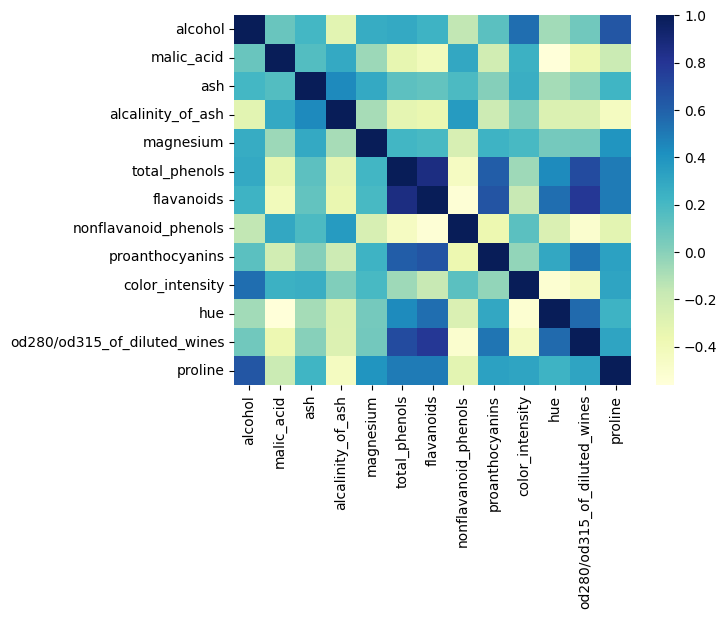

In [ ]:
import seaborn as sns

sns.heatmap(wine_corr, cmap = 'YlGnBu')

In [ ]:
# Take a minute to find the column where the correlation value is greater than 0.75 at least twice
to_drop = 'flavanoids'

# Drop that column from the DataFrame
wine_df = wine_df.drop(to_drop, axis=1)

## Feature Scaling / Standardization

▶  Question:  Why do we need to scale our data?
> If a feature’s variance is orders of magnitude more than the variance of other features, that particular feature might dominate other features in the dataset and make the estimator unable to learn from other features correctly, i.e. our learner might give more importance to features with high variance, which is not something we want happening in our model.

The following are a few different types of Scalers:


**MinMax Scaler:**

Scales values to a range between 0 and 1 if no negative values, and -1 to 1 if there are negative values present.

$$\frac{X - X_{min}}{X_{max} - X_{min}}$$

where,

 $$X\space is\space a\space feature\space value.$$
 $$X_{min} \space and \space X_{max} \space are \space corresponding \space feature's \space min \space and \space max \space values. $$


**Standard Scaler:**

$$\frac{X - mean}{\sigma}$$
where,
$$\sigma = standard \space deviation $$

**Robust Scaler:**

Uses statistics that are robust to outliers

$$\frac{X - median}{IQR}$$

where,

$$ IQR = Inter\space Quartile\space Range = Q_3 - Q_1 $$

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


**Option 1: Min Max Scalar**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [ ]:
# transform data
X_train_scaled = scaler.transform(X_train)

In [ ]:
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]


In [ ]:
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
# transform test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Test set accuracy without scaling: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy without scaling: 0.94


In [ ]:
# preprocessing using Min-Max scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

#train
knn.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Test set accuracy after Min-Max Scaling: {:.2f}".format(
    knn.score(X_test_scaled, y_test)))

Test set accuracy after Min-Max Scaling: 0.96


**Option 2: Standard Scalar**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#instead of using .fit() and .transform() separately, we can use .fit_transform()
X_scaled_d = scaler.fit_transform(X_train)

In [ ]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
knn.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("KNN test accuracy after Standard Scalar: {:.2f}".format(knn.score(X_test_scaled, y_test)))

KNN test accuracy after Standard Scalar: 0.95




---



---

After finishing Preprocessing, we have to do the rest of the steps in the machine learning pipeline :



*   **Data Splitting:** Splitting the dataset into train and test set. Additionally a validation / dev can be created to perform model tuning.
*   **Model Training:** Selecting a machine learning algorithm and training it on the processed train set.
*  **Model Prediction:** Using the trained model on a test set to make prediction.
*  **Model Evaluation:** Assessing the trained model using metrics like accuracy, precision, recall, or F1-score on validation data.
*  **Model Tuning:** Optimizing hyperparameters and repeating from step 5 to improve model performance.